In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
url = "https://raw.githubusercontent.com/Romka678/Machine_Learning/master/Video_Games_Sales_as_at_22_Dec_2016.csv"
data_raw = pd.read_csv(url)

# Описание и чтение

Таблица содержит данные о продаже 16719 игр с рейтингами,каждой игре соответсвует платформа,на которой ее запускали,год релиза игры,категория игры,издательство игры,продажи в Северной Америке,продажи в Европе,продажи в Японии и продажи в других странах,продажи в целом по всему миру(измеряются в миллионах копий),оценки критиков Metacritic,колличество критиков Metacritic,оценка подписчиков Metacritic,количество подписчиков,давших оценку игре,разработчик игры и возрастной рейтинг игры.

Посмотрим на размеры таблицы - количество строк (каждая строка соответствует названию игры) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data_raw.shape

(16719, 16)

In [4]:
data_raw.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_raw.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_raw

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_raw['User_Score'] = data_raw['User_Score'].replace('tbd', np.nan)

In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Столбцы (признаки) имеют имена:
* Name-Название игры
* Platform-Платформа,на которой она запускалась
* Year_of_Release-Год релиза игры
* Genre-Жанр игры
* Publisher-Издательство игры
* NA_Sales-Продажи в Северной Америке
* EU_Sales-Продажи в Европе
* JP_Sales-Продажи в Японии
* Other_Sales-Другие продажи(в других странах)
* Global_Sales-Продажи во всем мире, в целом
* Critic_Score-Оценки критиков
* Critic_Count-Количество критиков,давших оценку игре
* User_Score-Оценки пользователей
* User_Count-Количество пользователей,давших оценку игре
* Developer-Разработчик игры
* Rating-Возрастной рейтинг игры

Признаки Name,Platform,Genre,Publisher,Developer,Rating - номинальные (категориальные),Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count - количественные(числовые)

Требуется классифицировать игры какого жанра издавались в период 1980-2020 год по остальным признакам.(Задача классификации)

# Обработка категориальных признаков

Столбцы 'Genre', 'Platform', 'Publisher', 'Developer', 'Rating','User_Score' содержат категориальные признаки. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [9]:
data_raw['Genre'].dtype

dtype('O')

In [10]:
data_raw['Genre'] = data_raw['Genre'].astype('category')
data_raw['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform',
                  'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
                  'Sports', 'Strategy'],
                 ordered=False)

In [11]:
data_raw['Platform'].dtype

dtype('O')

In [12]:
data_raw['Platform'] = data_raw['Platform'].astype('category')
data_raw['Platform'].dtype

CategoricalDtype(categories=['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN',
                  'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3',
                  'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS',
                  'Wii', 'WiiU', 'X360', 'XB', 'XOne'],
                 ordered=False)

In [13]:
data_raw['Publisher'].dtype

dtype('O')

In [14]:
data_raw['Publisher'] = data_raw['Publisher'].astype('category')
data_raw['Publisher'].dtype

CategoricalDtype(categories=['10TACLE Studios', '1C Company',
                  '20th Century Fox Video Games', '2D Boy', '3DO', '49Games',
                  '505 Games', '5pb', '7G//AMES', '989 Sports',
                  ...
                  'Zushi Games', 'bitComposer Games', 'dramatic create',
                  'fonfun', 'iWin', 'id Software', 'imageepoch Inc.',
                  'inXile Entertainment', 'mixi, Inc', 'responDESIGN'],
                 ordered=False)

In [15]:
data_raw['Developer'].dtype

dtype('O')

In [16]:
data_raw['Developer'] = data_raw['Developer'].astype('category')
data_raw['Developer'].dtype

CategoricalDtype(categories=['10tacle Studios', '10tacle Studios, Fusionsphere Systems',
                  '1C, 1C Company', '1C, Ino-Co, 1C Company',
                  '1C, Various, 1C Company', '1C: Maddox Games', '1C:Ino-Co',
                  '1st Playable Productions', '2015', '2D Boy',
                  ...
                  'id Software', 'id Software, Nerve Software',
                  'id Software, Raven Software', 'n-Space', 'neo Software',
                  'odenis studio', 'oeFun', 'puzzle.tv', 'syn Sophia',
                  'zSlide'],
                 ordered=False)

In [17]:
data_raw['Rating'].dtype

dtype('O')

In [18]:
data_raw['Rating'] = data_raw['Rating'].astype('category')
data_raw['Rating'].dtype

CategoricalDtype(categories=['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'], ordered=False)

In [19]:
data_raw['User_Score'].dtype

dtype('O')

In [49]:
data_raw['User_Score'] = data_raw['User_Score'].astype('float64')
data_raw['User_Score'].dtype

dtype('float64')

# Обработка пропущенных значений

In [50]:
data_raw.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

Необходимо заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [51]:
data_raw.fillna(data_raw.median(axis = 0), axis = 0, inplace=True)

In [52]:
data_raw.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [53]:
data_raw['Name'].fillna(data_raw['Name'].mode().iloc[0], inplace=True)
data_raw['Genre'].fillna(data_raw['Genre'].mode().iloc[0], inplace=True)
data_raw['Publisher'].fillna(data_raw['Publisher'].mode().iloc[0], inplace=True)
data_raw['User_Score'].fillna(data_raw['User_Score'].mode().iloc[0], inplace=True)
data_raw['Developer'].fillna(data_raw['Developer'].mode().iloc[0], inplace=True)
data_raw['Rating'].fillna(data_raw['Rating'].mode().iloc[0], inplace=True)

In [54]:
data_raw.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

# Визуализация данных

In [55]:
print(data_raw.shape)
print(data_raw.columns)

(16719, 16)
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [56]:
data_raw.index

RangeIndex(start=0, stop=16719, step=1)

In [57]:
data_raw.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16719,16719,16719.000000,16719,16719,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719,16719
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ubisoft,E
freq,14,2161,NaN,3372,1410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6827,10760
mean,NaN,NaN,2006.495604,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,70.010886,23.609068,7.493588,86.752856,NaN,NaN
std,NaN,NaN,5.831862,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,9.776336,13.509406,1.065040,384.376835,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,71.000000,21.000000,7.600000,24.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.800000,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,71.000000,21.000000,7.800000,24.000000,NaN,NaN


In [58]:
data_raw.describe(include=['category'])

,Platform,Genre,Publisher,Developer,Rating
count,16719,16719,16719,16719,16719
unique,31,12,581,1696,8
top,PS2,Action,Electronic Arts,Ubisoft,E
freq,2161,3372,1410,6827,10760


Построим попарные матрицы разброса:

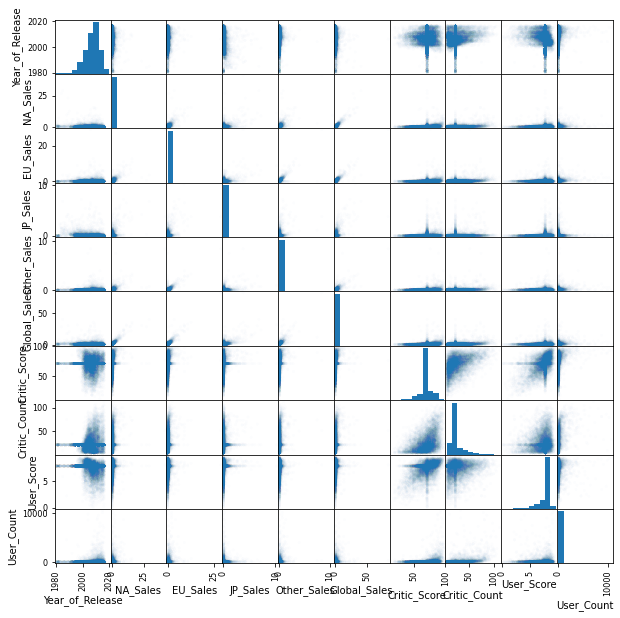

In [59]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

Вычислим матрицу корреляции для количественных признаков.Используем визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции.

In [60]:
data_raw.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092427,0.003684,-0.168461,0.037530,-0.076476,-0.006417,0.130877,-0.182134,0.117709
NA_Sales,-0.092427,1.000000,0.765336,0.449598,0.638654,0.941010,0.172929,0.243872,0.022943,0.208496
EU_Sales,0.003684,0.765336,1.000000,0.435068,0.722796,0.901239,0.180717,0.263949,0.000607,0.271543
JP_Sales,-0.168461,0.449598,0.435068,1.000000,0.291096,0.612300,0.098274,0.091652,0.088483,0.034694
Other_Sales,0.037530,0.638654,0.722796,0.291096,1.000000,0.749242,0.170271,0.255615,0.001167,0.247382
Global_Sales,-0.076476,0.941010,0.901239,0.612300,0.749242,1.000000,0.189724,0.263008,0.030024,0.234568
Critic_Score,-0.006417,0.172929,0.180717,0.098274,0.170271,0.189724,1.000000,0.394183,0.457942,0.242509
Critic_Count,0.130877,0.243872,0.263949,0.091652,0.255615,0.263008,0.394183,1.000000,0.071767,0.389130
User_Score,-0.182134,0.022943,0.000607,0.088483,0.001167,0.030024,0.457942,0.071767,1.000000,-0.031249
User_Count,0.117709,0.208496,0.271543,0.034694,0.247382,0.234568,0.242509,0.389130,-0.031249,1.000000


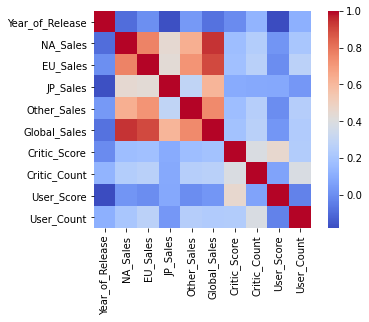

In [61]:
corr_mat=data_raw.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Наблюдается корреляция между продажами в Северной Америке,Европе,Японии,других странах и глобальных продаж. И небольшая корреляция между количеством критиков и их оценкой

Выведем коэффициенты корреляции, большие заданного значения:

In [62]:
corr_mat > 0.5

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,True,False,False,False,False,False,False,False,False,False
NA_Sales,False,True,True,False,True,True,False,False,False,False
EU_Sales,False,True,True,False,True,True,False,False,False,False
JP_Sales,False,False,False,True,False,True,False,False,False,False
Other_Sales,False,True,True,False,True,True,False,False,False,False
Global_Sales,False,True,True,True,True,True,False,False,False,False
Critic_Score,False,False,False,False,False,False,True,False,False,False
Critic_Count,False,False,False,False,False,False,False,True,False,False
User_Score,False,False,False,False,False,False,False,False,True,False
User_Count,False,False,False,False,False,False,False,False,False,True


Коллинеарными называются признаки, которые сильно коррелируют друг с другом. В машинном обучении это приводит к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели. Сильно коррелированные друг с другом переменные дают модели одну и ту же информацию, следовательно, для анализа не нужно использовать их все.

Построим диаграммы рассеивания для признаков Genre и Global_Sales,Critic_Score,User_Score:

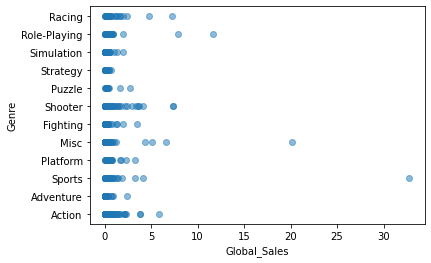

In [63]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.scatter(data_raw.iloc[random_subset]['Global_Sales'], data_raw.iloc[random_subset]['Genre'], alpha=0.5)
plt.xlabel('Global_Sales')
plt.ylabel('Genre')
pass

Как видно из диаграммы,больше всего в мире продаются игры следующих жанров:
* Shooter
* Racing
* Action

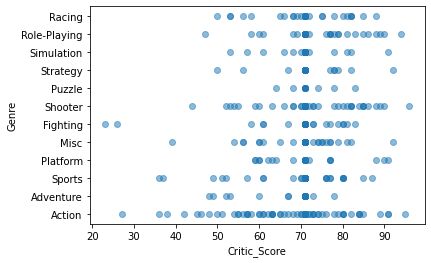

In [64]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.scatter(data_raw.iloc[random_subset]['Critic_Score'], data_raw.iloc[random_subset]['Genre'], alpha=0.5)
plt.xlabel('Critic_Score')
plt.ylabel('Genre')
pass

Диаграмма показывает,что в среднем всем играм критики чаще всего ставили оценку 70 из 100,и наиболее высокие оценки получили игры следующих жанров:
* Role-Playing
* Shooter
* Action
А наименьшие оценки получили игры этих жанров:
* Fighting
* Action

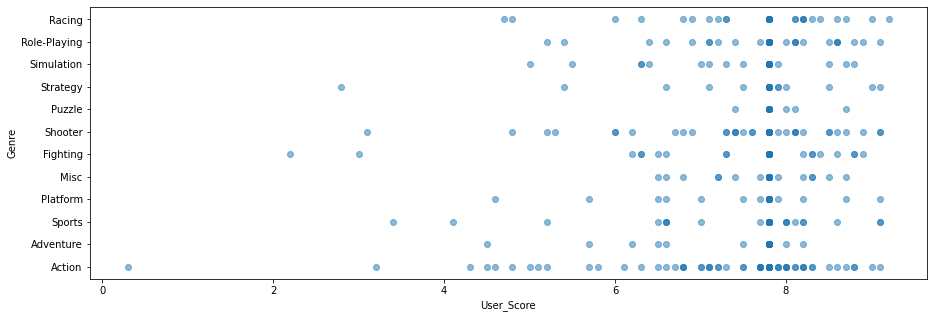

In [65]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.figure(figsize = (15, 5))
plt.scatter(data_raw.iloc[random_subset]['User_Score'], data_raw.iloc[random_subset]['Genre'], alpha=0.5)
plt.xlabel('User_Score')
plt.ylabel('Genre')
pass

Как видно из диаграммы,пользователи солидарны с критиками,но также высокие оценки получили игры жанра
* Racing
В целом можно видеть,что пользователи ставят чаще низкие оценки,нежели критики

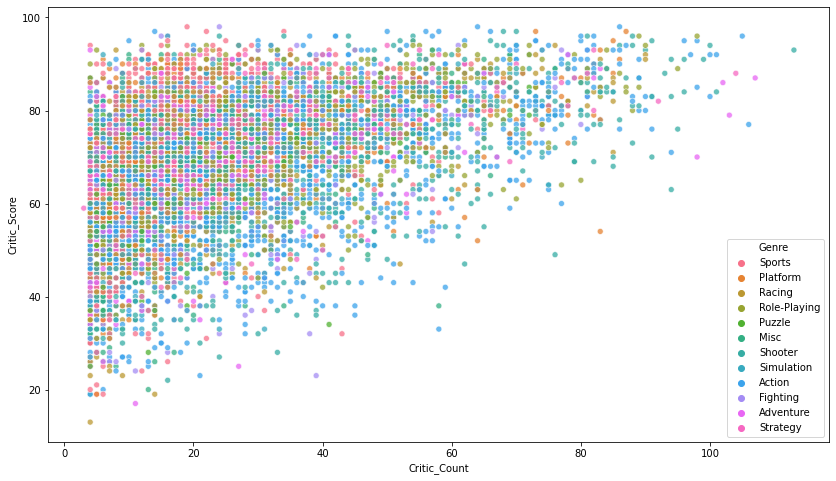

In [66]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x='Critic_Count', y='Critic_Score', hue='Genre', data=data_raw, alpha=0.75)
pass

Как видно из диаграммы, критики наиболее часто оценивали игры в жанрах:
* Action
* Shooter
* Simulator

# Нормализация признаков

In [67]:
X0 = data_raw.drop('Genre', axis = 1)
y = data_raw['Genre']
print("x:", X.shape)
print("y:", y.shape)


x: (16719, 10)
y: (16719,)


In [68]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             16719 non-null  object  
 1   Platform         16719 non-null  category
 2   Year_of_Release  16719 non-null  float64 
 3   Genre            16719 non-null  category
 4   Publisher        16719 non-null  category
 5   NA_Sales         16719 non-null  float64 
 6   EU_Sales         16719 non-null  float64 
 7   JP_Sales         16719 non-null  float64 
 8   Other_Sales      16719 non-null  float64 
 9   Global_Sales     16719 non-null  float64 
 10  Critic_Score     16719 non-null  float64 
 11  Critic_Count     16719 non-null  float64 
 12  User_Score       16719 non-null  float64 
 13  User_Count       16719 non-null  float64 
 14  Developer        16719 non-null  category
 15  Rating           16719 non-null  category
dtypes: category(5), float64(10), object(1)
m

In [69]:
X1 = X0.drop('Name', axis = 1)

In [70]:
X2 = X1.drop('Platform', axis = 1)

In [71]:
X3 = X2.drop('Publisher', axis = 1)

In [72]:
X4 = X3.drop('Rating', axis = 1)

In [73]:
X = X4.drop('Developer', axis = 1)

Убрали данные столбцы,так как они не влияют на выборку,их не будем учитывать.

In [74]:
X

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
1,1985.0,29.08,3.58,6.81,0.77,40.24,71.0,21.0,7.8,24.0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
4,1996.0,11.27,8.89,10.22,1.00,31.37,71.0,21.0,7.8,24.0
...,...,...,...,...,...,...,...,...,...,...
16714,2016.0,0.00,0.00,0.01,0.00,0.01,71.0,21.0,7.8,24.0
16715,2006.0,0.00,0.01,0.00,0.00,0.01,71.0,21.0,7.8,24.0
16716,2016.0,0.00,0.00,0.01,0.00,0.01,71.0,21.0,7.8,24.0
16717,2003.0,0.01,0.00,0.00,0.00,0.01,71.0,21.0,7.8,24.0


In [75]:
X = (X - X.mean(axis = 0))/X.std(axis = 0)

In [76]:
X.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04
mean,8.467444e-15,-1.025366e-14,-8.447274e-14,-2.609545e-14,3.432869e-14,-4.190955e-14,2.382958e-14,-1.177482e-14,-1.238688e-12,-1.541444e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.543250e+00,-3.236950e-01,-2.881574e-01,-2.512875e-01,-2.535044e-01,-3.382200e-01,-5.831519e+00,-1.525535e+00,-7.035970e+00,-2.152910e-01
25%,-5.993976e-01,-3.236950e-01,-2.881574e-01,-2.512875e-01,-2.535044e-01,-3.059189e-01,1.011743e-01,-1.931297e-01,9.991351e-02,-1.632587e-01
50%,8.648974e-02,-2.253561e-01,-2.484184e-01,-2.512875e-01,-1.999454e-01,-2.348565e-01,1.011743e-01,-1.931297e-01,2.876999e-01,-1.632587e-01
75%,6.009052e-01,-2.867848e-02,-6.959266e-02,-1.217614e-01,-9.282731e-02,-4.104996e-02,1.011743e-01,-1.931297e-01,2.876999e-01,-1.632587e-01
max,2.315623e+00,5.051748e+01,5.725399e+01,3.284263e+01,5.635838e+01,5.297151e+01,2.862945e+00,6.616940e+00,2.071671e+00,2.752051e+01


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

11703 5016


In [78]:
from sklearn.ensemble import RandomForestClassifier
trees_array = np.array([10,20,40,80,160])
for i in range (5):
    rfc = RandomForestClassifier(n_estimators = trees_array[i])
    rfc.fit(X_train, y_train)
    print('trees =',trees_array[i],'train accuracy =',rfc.score(X_train, y_train),'test accuracy =', rfc.score(X_test, y_test))
    i+=1

trees = 10 train accuracy = 0.847816799111339 test accuracy = 0.25318979266347685
trees = 20 train accuracy = 0.8594377510040161 test accuracy = 0.2661483253588517
trees = 40 train accuracy = 0.8608049218149193 test accuracy = 0.2769138755980861
trees = 80 train accuracy = 0.8609758181662821 test accuracy = 0.2805023923444976
trees = 160 train accuracy = 0.8610612663419636 test accuracy = 0.2838915470494418


Метод RandomForest показывает самую высокую точность на обучаещей выборке для 160 деревьев - 86%.На тестовой самая высокая точность достигается при 80 деревьев - 28%.

In [79]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_array = np.array([1,10,20,30,40,50])
for i in range (6):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    print('neighbours =',neighbors_array[i],'train accuracy =',knn.score(X_train, y_train),'test accuracy =', knn.score(X_test, y_test))
    i+=1

neighbours = 1 train accuracy = 0.8399555669486456 test accuracy = 0.20135566188197768
neighbours = 10 train accuracy = 0.38357686063402546 test accuracy = 0.25598086124401914
neighbours = 20 train accuracy = 0.3416218063744339 test accuracy = 0.2701355661881978
neighbours = 30 train accuracy = 0.32487396394086987 test accuracy = 0.28169856459330145
neighbours = 40 train accuracy = 0.31547466461591045 test accuracy = 0.2852870813397129
neighbours = 50 train accuracy = 0.3065880543450397 test accuracy = 0.2878787878787879


kNN метод показывает самую высокую точность на обучаещей выборке для 1 соседа - 83%. При увеличении количества соседей, точность на обучающей выборке падает, а на тестовой самая высокая точность достигается при 50 соседях - 28%,увеличивается с увеличением количества соседей.

# Выводы:

Метод kNN показал меньшую точность,чем Random_Forest.